Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, log_loss

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [4]:
df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

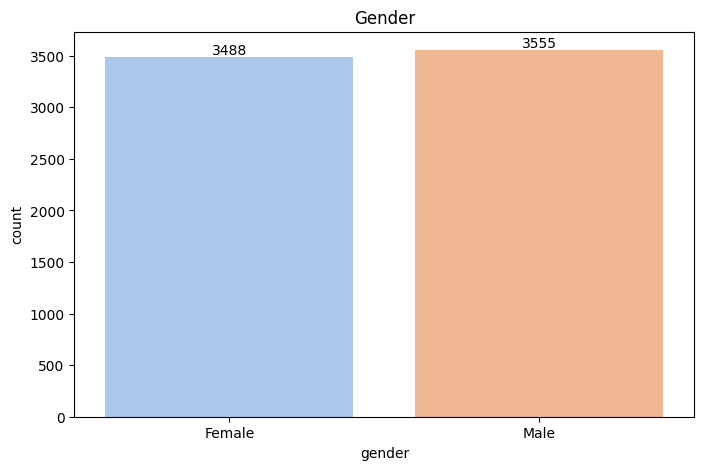

In [5]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['gender'], palette='pastel')

gr.bar_label(container=gr.containers[0])
plt.title('Gender')

plt.show()

##### 2. Какое количество уникальных значений у поля InternetService?

In [6]:
len(df['InternetService'].unique())

3

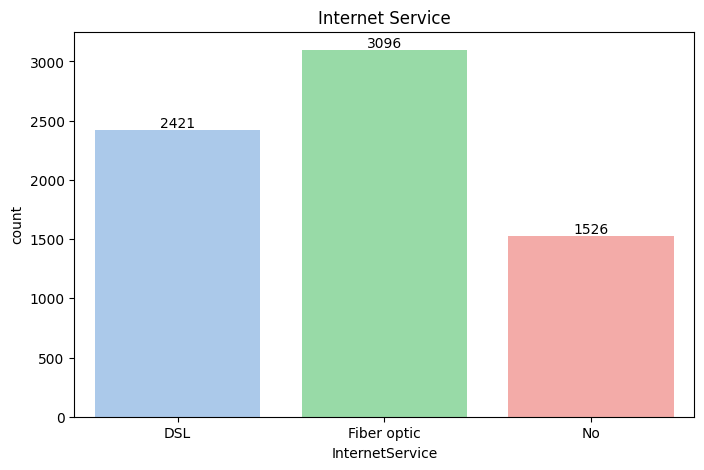

In [7]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['InternetService'], palette='pastel6')

gr.bar_label(container=gr.containers[0])
plt.title('Internet Service')

plt.show()

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [8]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

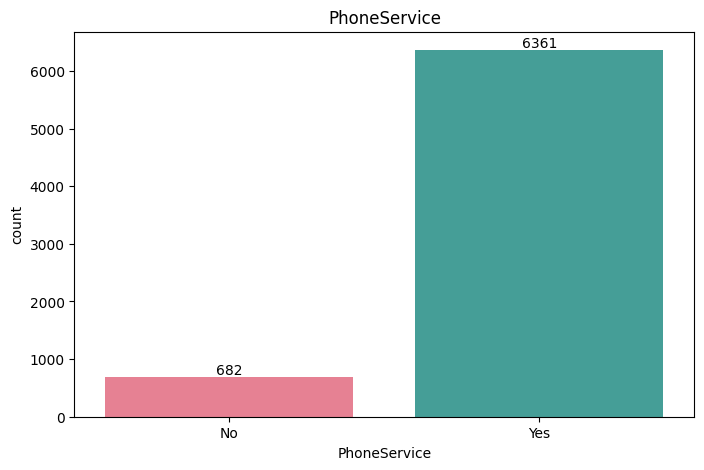

In [10]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['PhoneService'], palette='husl')

gr.bar_label(container=gr.containers[0])
plt.title('PhoneService')

plt.show()

In [11]:
df['PhoneService'] = df['PhoneService'].replace(['No', 'Yes'], [0, 1])

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float32').fillna(0)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

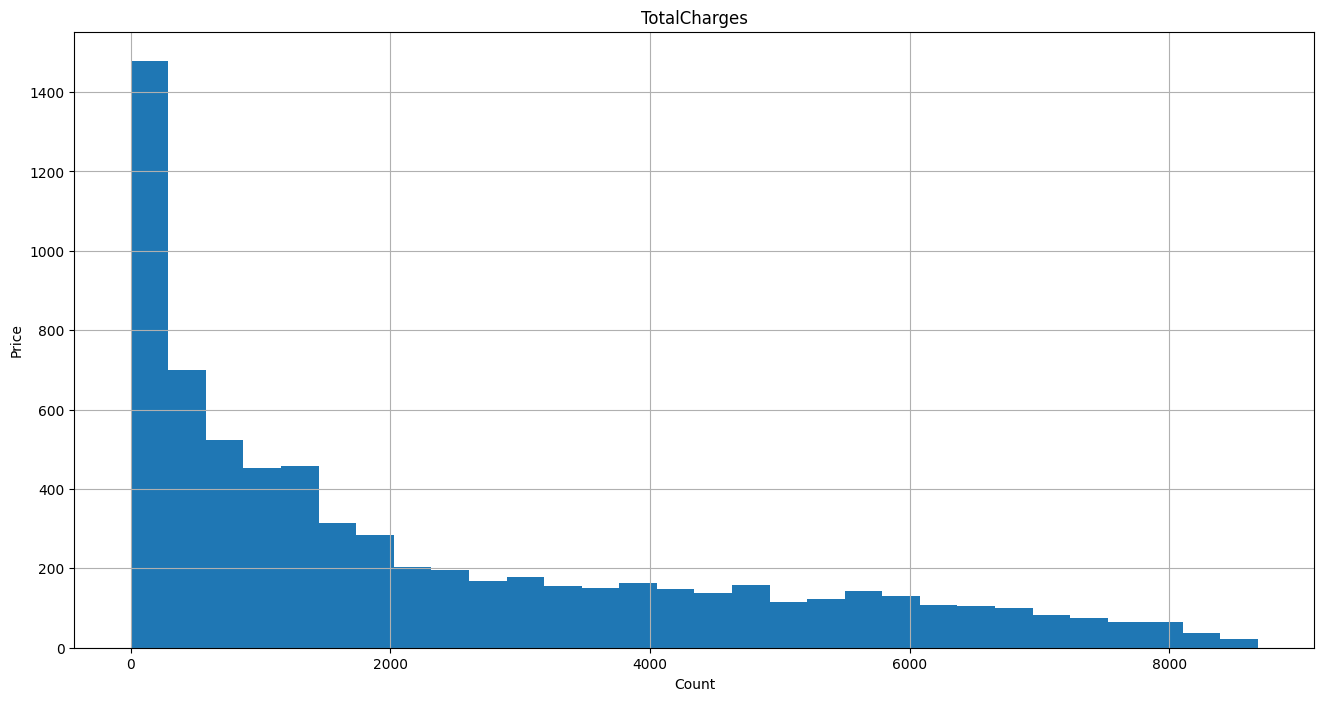

In [13]:
plt.figure(figsize=(16, 8))

df['TotalCharges'].hist(bins=30)
plt.xlabel('Count')
plt.ylabel('Price')

plt.title('TotalCharges')
plt.show()

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

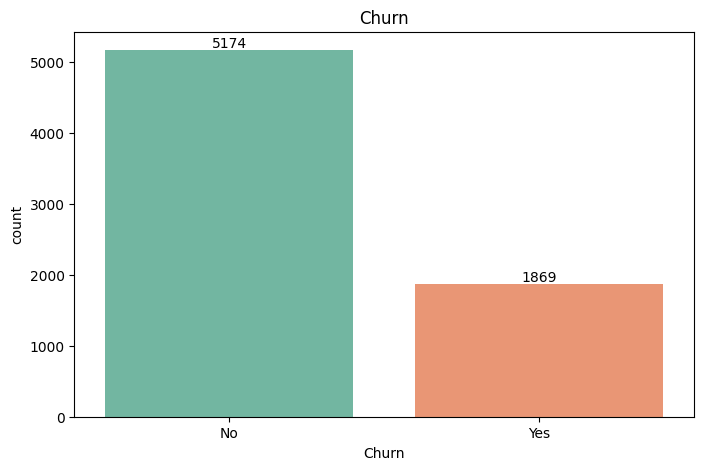

In [14]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['Churn'], palette='Set2')

gr.bar_label(container=gr.containers[0])
plt.title('Churn')

plt.show()

In [15]:
df['Churn'] = df['Churn'].replace(['No', 'Yes'], [0, 1])

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

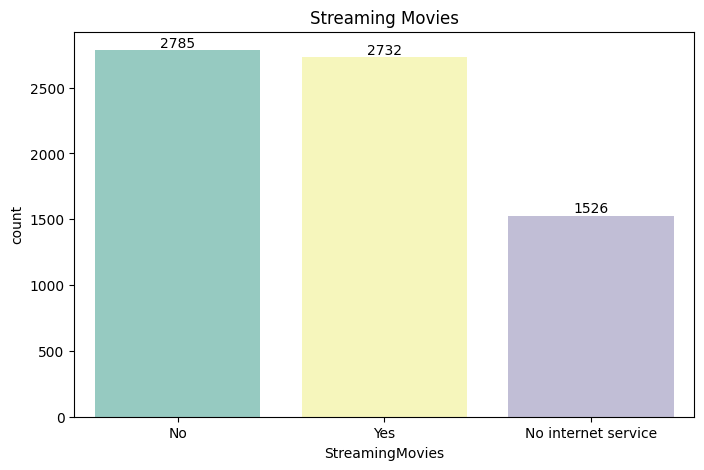

In [16]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['StreamingMovies'], palette='Set3')

gr.bar_label(container=gr.containers[0])
plt.title('Streaming Movies')

plt.show()

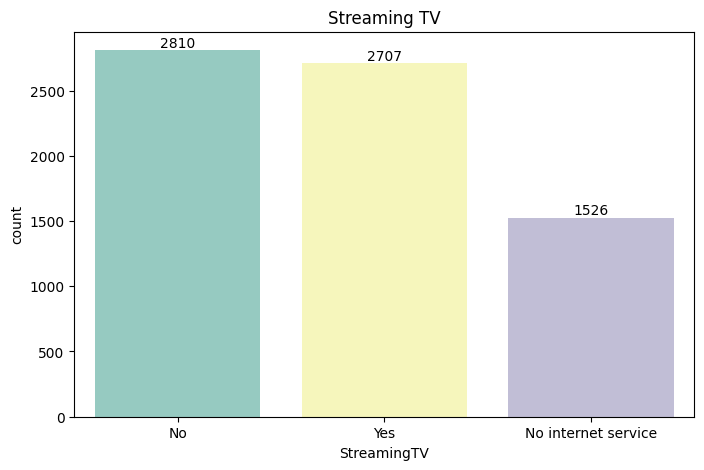

In [17]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['StreamingTV'], palette='Set3')

gr.bar_label(container=gr.containers[0])
plt.title('Streaming TV')

plt.show()

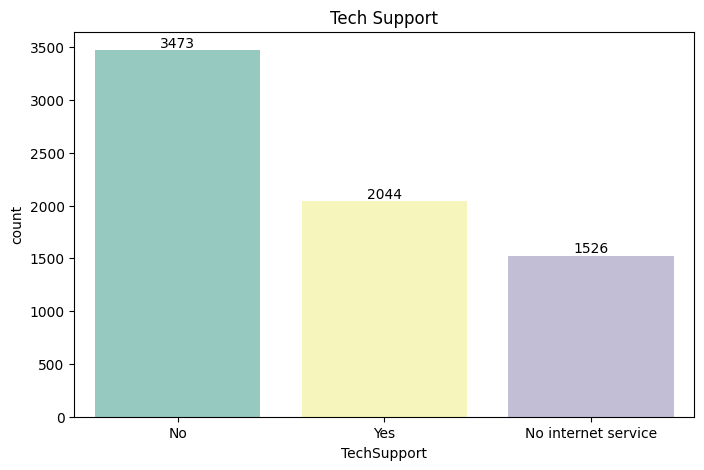

In [18]:
plt.figure(figsize=(8, 5))

gr = sns.countplot(x=df['TechSupport'], palette='Set3')

gr.bar_label(container=gr.containers[0])
plt.title('Tech Support')

plt.show()

In [19]:
for name in ['StreamingMovies', 'StreamingTV', 'TechSupport']:
    df[name] = df[name].replace(['No', 'No internet service', 'Yes'], [0, 0, 1])

##### 8. Заполните пропуски в поле PhoneService значением 0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df['PhoneService'] = df['PhoneService'].fillna(0)

#### 9. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [22]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
df = df[columns]
df.head()

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1
3,Male,45,0,1840.750000,0,0,1,0
4,Female,2,1,151.649994,0,0,0,1


##### 10. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [23]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
            'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], 
                                                    test_size=.33, random_state=42)

##### 11. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [24]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional 
    transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return x[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional 
    transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return x[[self.key]]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, x, y=None):
        self.columns = [col for col in pd.get_dummies(x, prefix=self.key).columns]
        return self

    def transform(self, x):
        x = pd.get_dummies(x, prefix=self.key)
        test_columns = [col for col in x.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                x[col_] = 0
        return x[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 12. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [25]:
gender.fit_transform(x_train)

,gender_Female,gender_Male
298,0,1
3318,0,1
5586,1,0
6654,1,0
5362,0,1
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 13. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [26]:
tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 14. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [27]:
total_charges =  Pipeline([('selector', NumberSelector(key='TotalCharges')), 
                           ('standard', StandardScaler())])

Объединение всех "кубиков" очень легко сделать таким образом

In [28]:
number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [29]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', total_charges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [30]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key=['PhoneService',
                                                                                      'StreamingMovies',
                                                                                      'StreamingTV',
                                                                                      'TechSupport']))])),
                                                ('gender',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### 15. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [31]:
pipeline.predict_proba(x_test)

array([[0.26, 0.74],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.24, 0.76],
       [0.13, 0.87],
       [0.8 , 0.2 ]])

##### 16. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [32]:
roc_auc = roc_auc_score(y_true=y_test, y_score=pipeline.predict_proba(x_test)[:, 1])
logloss = log_loss(y_true=y_test, y_pred=pipeline.predict_proba(x_test)[:, 1])
print(f'roc auc = {round(roc_auc, 4)}\nlogloss = {round(logloss, 4)}')

roc auc = 0.7848
logloss = 0.8134


### Сохраним наш пайплайн

In [33]:
import dill
with open('model_RF.dill', 'wb') as f:
    dill.dump(pipeline, f)